# Project - Breast Cancer Prediction

## 1. Data Preprocessing

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Reading the Data File

columns = ["Sample code number", "Clump Thickness",
          "Uniformity of Cell Size", "Uniformity of Cell Shape",
          "Marginal Adhesion", "Single Epithelial Cell Size",
          "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
          "Mitoses", "Class"]



data = pd.read_csv("breast-cancer-wisconsin.csv", names=columns)

data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.shape

(699, 11)

In [4]:
# Checking for 'NULL' values

data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
# Checking for Duplicated Instances

data.duplicated().sum()

8

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
# Bare Nuclei tab is missing

In [9]:
data.value_counts('Bare Nuclei')

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [10]:
data["Bare Nuclei"] = data["Bare Nuclei"].apply(lambda x: 0 if x == '?' else int(x))

In [11]:
data.value_counts('Bare Nuclei')

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: count, dtype: int64

In [12]:
data.drop(data[(data['Bare Nuclei'] == 0)].index, inplace=True)

In [13]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
X = data.drop(['Sample code number','Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# KNN Classifier

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

knn_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)

print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9562043795620438


Best k value: 7


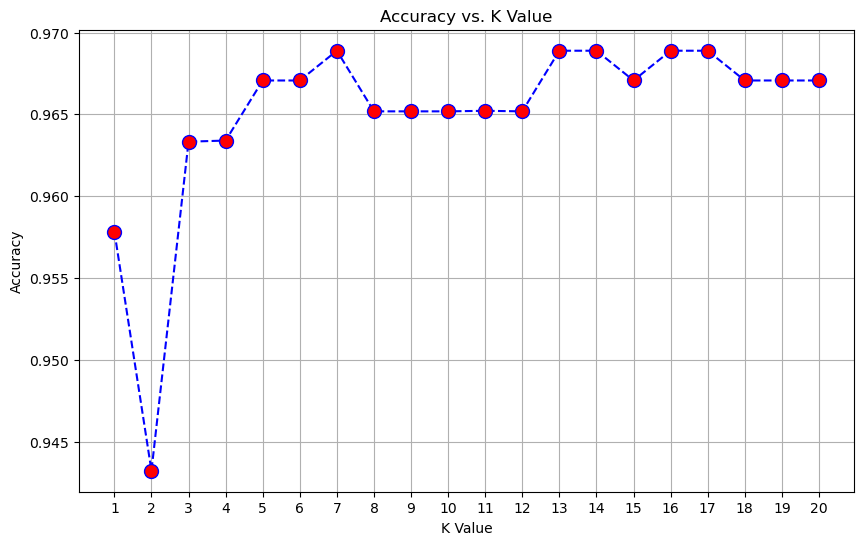

In [16]:
# List of k values to try
k_values = list(range(1, 21))  # Try k values from 1 to 20

# List to store cross-validation scores for each k value
cv_scores = []

# Perform 10-fold cross-validation for each k value
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# # Iterate over k from 1 to 20
# for k in range(1, 21):
#     knn_k = KNeighborsClassifier(n_neighbors=k)
#     knn_k.fit(X_train, y_train)
#     y_pred_k = knn_k.predict(X_test)
#     accuracy_k = accuracy_score(y_test, y_pred_k)
#     cv_scores.append(accuracy_k)
    

# Find the best k value with the highest cross-validation score
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Best k value:", best_k)

# Plotting the cross-validation scores for different k values (optional)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), cv_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


In [17]:
# Logistic Regression Classifier

lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train, y_train)

lr_pred = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9562043795620438


In [18]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9635036496350365


In [19]:
# Neural Network Classifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
nn_classifier.fit(X_train, y_train)

nn_pred = nn_classifier.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_pred)

print("Neural Network Accuracy:", nn_accuracy)

Neural Network Accuracy: 0.9416058394160584


In [20]:
from sklearn.model_selection import GridSearchCV
list(range(1, 21))
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define hyperparameters grid for each classifier
knn_param_grid = {'n_neighbors': list(range(1, 11))}
# lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
# nn_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'alpha': [0.0001, 0.001, 0.01, 0.1]}

# GridSearchCV for each classifier
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10, scoring='accuracy')
# lr_grid_search = GridSearchCV(LogisticRegression(max_iter=10000), lr_param_grid, cv=5, scoring='accuracy')
# rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
# nn_grid_search = GridSearchCV(MLPClassifier(max_iter=500), nn_param_grid, cv=5, scoring='accuracy')


knn_grid_search.fit(X_train, y_train)


knn_results = pd.DataFrame(knn_grid_search.cv_results_)
knn_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001057,0.001181,0.003029,0.002903,1,{'n_neighbors': 1},0.963636,0.981818,0.981818,0.927273,0.945455,0.963636,0.962963,0.981481,0.944444,0.925926,0.957845,0.020219,9
1,0.003244,0.006150,0.001466,0.001120,2,{'n_neighbors': 2},0.945455,0.981818,0.963636,0.909091,0.927273,0.927273,0.925926,0.981481,0.944444,0.925926,0.943232,0.023767,10
2,0.000717,0.000227,0.002096,0.002087,3,{'n_neighbors': 3},0.945455,0.981818,0.981818,0.945455,0.963636,0.981818,0.962963,0.962963,0.944444,0.962963,0.963333,0.014219,8
3,0.000922,0.000514,0.002389,0.001797,4,{'n_neighbors': 4},0.945455,0.963636,0.981818,0.945455,0.963636,0.963636,0.981481,0.981481,0.944444,0.962963,0.963401,0.014131,7
4,0.000818,0.000354,0.002959,0.001473,5,{'n_neighbors': 5},0.945455,0.981818,1.000000,0.927273,0.963636,0.963636,0.981481,1.000000,0.944444,0.962963,0.967071,0.022798,2
5,0.000628,0.000131,0.001368,0.000841,6,{'n_neighbors': 6},0.945455,0.981818,0.981818,0.945455,0.945455,0.981818,0.981481,1.000000,0.944444,0.962963,0.967071,0.019685,2
6,0.000579,0.000056,0.001095,0.000056,7,{'n_neighbors': 7},0.945455,0.981818,1.000000,0.945455,0.945455,0.981818,0.981481,1.000000,0.944444,0.962963,0.968889,0.021700,1
7,0.000585,0.000097,0.001108,0.000192,8,{'n_neighbors': 8},0.945455,0.981818,1.000000,0.945455,0.945455,0.981818,0.962963,1.000000,0.944444,0.944444,0.965185,0.022384,4
8,0.000575,0.000042,0.001074,0.000057,9,{'n_neighbors': 9},0.945455,0.981818,1.000000,0.945455,0.945455,0.981818,0.962963,1.000000,0.944444,0.944444,0.965185,0.022384,4
9,0.000568,0.000049,0.001089,0.000064,10,{'n_neighbors': 10},0.945455,0.981818,1.000000,0.945455,0.945455,0.981818,0.962963,1.000000,0.944444,0.944444,0.965185,0.022384,4


In [21]:
# Fit the grid search objects
knn_grid_search.fit(X_train, y_train)
# lr_grid_search.fit(X_train, y_train)
# rf_grid_search.fit(X_train, y_train)
# nn_grid_search.fit(X_train, y_train)

# Best hyperparameters and corresponding accuracy for each classifier
print("KNN Best Params:", knn_grid_search.best_params_)
print("KNN Best Accuracy:", knn_grid_search.best_score_)

# print("Logistic Regression Best Params:", lr_grid_search.best_params_)
# print("Logistic Regression Best Accuracy:", lr_grid_search.best_score_)

# print("Random Forest Best Params:", rf_grid_search.best_params_)
# print("Random Forest Best Accuracy:", rf_grid_search.best_score_)

# print("Neural Network Best Params:", nn_grid_search.best_params_)
# print("Neural Network Best Accuracy:", nn_grid_search.best_score_)

KNN Best Params: {'n_neighbors': 7}
KNN Best Accuracy: 0.968888888888889


In [1]:
print('Hello World')

Hello World
